EnergyPlusEnv: Severe error(s) occurred. Error count: -1
EnergyPlusEnv: Check contents of log/output/episode-00000000/eplusout.err
Starting new environment
start_instance(): idx=0, model_file=/home/xiaonanchong/rl-testbed-for-energyplus/EnergyPlus/Model/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
start_instance(): weather_files[0]=/usr/local/EnergyPlus-8-8-0/WeatherData/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw
Starting EnergyPlus with command: /usr/local/EnergyPlus-8-8-0/energyplus -r -x -d log/output/episode-00000000 -w log/output/episode-00000000/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw log/output/episode-00000000/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
PipeIo.readline: Opening OBS pipe [/tmp/extctrl_884_obs]
observation: [6.8249998e+00 2.3000271e+01 2.3000275e+01 7.4710117e+04 7.2531984e+04
 2.1781274e+03]
action tensor([[-0.8613,  0.5690, -0.2655, -0.1353]], grad_fn=<TanhBackward>)
PipeIo.writeline: Opened ACT pipe /tmp/extctrl_884_act
observation: [6.8249998e+00 2.30

action tensor([[-0.7691,  0.2747, -0.0908, -0.2168]], grad_fn=<TanhBackward>)
observation: [7.1999998e+00 1.9506542e+01 4.3314114e+01 1.2120616e+05 1.1869581e+05
 2.5103467e+03]
action tensor([[-0.8613,  0.5690, -0.2655, -0.1353]], grad_fn=<TanhBackward>)
observation: [7.19999981e+00 1.95065422e+01 4.33141136e+01 1.21142305e+05
 1.18695812e+05 2.44649365e+03]
action tensor([[-0.7691,  0.2747, -0.0908, -0.2168]], grad_fn=<TanhBackward>)
observation: [7.1999998e+00 1.9506542e+01 4.3314114e+01 1.2121769e+05 1.1869581e+05
 2.5218735e+03]
action tensor([[-0.8613,  0.5690, -0.2655, -0.1353]], grad_fn=<TanhBackward>)
observation: [7.19999981e+00 1.95065422e+01 4.33141136e+01 1.21142305e+05
 1.18695812e+05 2.44649365e+03]
action tensor([[-0.7691,  0.2747, -0.0908, -0.2168]], grad_fn=<TanhBackward>)
observation: [7.1999998e+00 1.9976831e+01 4.3137402e+01 1.2121791e+05 1.1869581e+05
 2.5220938e+03]
action tensor([[-0.8613,  0.5690, -0.2655, -0.1353]], grad_fn=<TanhBackward>)
observation: [7.1999

observation: [4.4000001e+00 2.0405859e+01 4.9367992e+01 1.2936595e+05 1.2681060e+05
 2.5553467e+03]
action tensor([[-0.7691,  0.2747, -0.0908, -0.2168]], grad_fn=<TanhBackward>)
observation: [4.40000010e+00 2.04095936e+01 4.94172821e+01 1.29432945e+05
 1.26877594e+05 2.55534668e+03]
action tensor([[-0.7691,  0.2747, -0.0908, -0.2168]], grad_fn=<TanhBackward>)
observation: [4.8249998e+00 2.0413004e+01 4.9460186e+01 1.2949112e+05 1.2693577e+05
 2.5553467e+03]
action tensor([[-0.7691,  0.2747, -0.0908, -0.2168]], grad_fn=<TanhBackward>)
observation: [4.8249998e+00 2.0413004e+01 4.9460186e+01 1.5543923e+05 1.5292889e+05
 2.5103467e+03]
action tensor([[-0.7691,  0.2747, -0.0908, -0.2168]], grad_fn=<TanhBackward>)


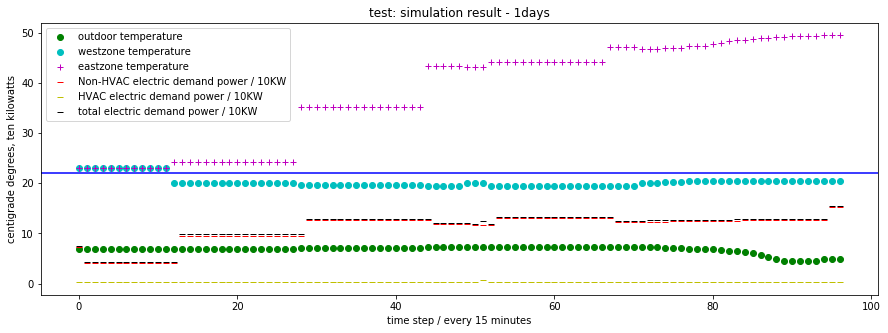

In [23]:
import torch
mlp = torch.load('/home/xiaonanchong/policy-gradient/TRAINED_MODEL')

r = 1e4
TT = 22 # target temperature
d = 3

import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

env_id = 'gym_energyplus:EnergyPlus-v0'
env = gym.make(env_id)

plt.rcParams['figure.figsize'] = [15, 5]
plt.title('test: simulation result - 1days')
plt.xlabel('time step / every 15 minutes')
plt.ylabel('centigrade degrees, ten kilowatts')

plt.axhline(y=TT, color='b', linestyle='-')

observation = env.reset()

plt.plot(0, observation[0], 'go', label='outdoor temperature')
plt.plot(0, observation[1], 'co', label='westzone temperature')
plt.plot(0, observation[2], 'm+', label='eastzone temperature')
plt.plot(0, observation[4]/r, 'r_', label='Non-HVAC electric demand power / 10KW')
plt.plot(0, observation[5]/r, 'y_', label='HVAC electric demand power / 10KW')
plt.plot(0, observation[3]/r, 'k_', label='total electric demand power / 10KW')

for i in range(96):
    #################################################
    ob = np.array(observation,dtype=np.float32)
    print('observation:', ob)
    x = torch.from_numpy(ob).view(-1,6)
    y = mlp(x)
    print('action:', y)
    [action] = y.cpu().detach().numpy()    
    #################################################
    observation, reward, done, info = env.step(action)
      
    plt.plot(i+1, observation[0], 'go')
    plt.plot(i+1, observation[1], 'co')
    plt.plot(i+1, observation[2], 'm+')
    plt.plot(i+1, observation[4]/r, 'r_')
    plt.plot(i+1, observation[5]/r, 'y_')
    plt.plot(i+1, observation[3]/r, 'k_')
    
plt.legend()